<a href="https://colab.research.google.com/github/YasirHabib/Deep-Learning-Advanced-Computer-Vision/blob/master/fruits_360_resnet_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import os
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from keras.layers import Dense, Flatten
from keras.models import Model
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [0]:
from glob import glob

In [103]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [0]:
# https://www.kaggle.com/moltean/fruits
path = '/content/gdrive/My Drive/Colab Notebooks/Deep Learning: Advanced Computer Vision/fruits-360/'

In [0]:
train_dir = os.path.join(path, 'Training')
validation_dir = os.path.join(path, 'Test')

In [106]:
num_apple_train = len(glob(train_dir + '/Apple Golden 1/*.jp*g'))
num_avocado_train = len(glob(train_dir + '/Avocado/*.jp*g'))
num_banana_train = len(glob(train_dir + '/Banana/*.jp*g'))
num_kiwi_train = len(glob(train_dir + '/Kiwi/*.jp*g'))
num_lemon_train = len(glob(train_dir + '/Lemon/*.jp*g'))
num_mango_train = len(glob(train_dir + '/Mango/*.jp*g'))
num_raspberry_train = len(glob(train_dir + '/Raspberry/*.jp*g'))
num_strawberry_train = len(glob(train_dir + '/Strawberry/*.jp*g'))

num_apple_validation = len(glob(validation_dir + '/Apple Golden 1/*.jp*g'))
num_avocado_validation = len(glob(validation_dir + '/Avocado/*.jp*g'))
num_banana_validation = len(glob(validation_dir + '/Banana/*.jp*g'))
num_kiwi_validation = len(glob(validation_dir + '/Kiwi/*.jp*g'))
num_lemon_validation = len(glob(validation_dir + '/Lemon/*.jp*g'))
num_mango_validation = len(glob(validation_dir + '/Mango/*.jp*g'))
num_raspberry_validation = len(glob(validation_dir + '/Raspberry/*.jp*g'))
num_strawberry_validation = len(glob(validation_dir + '/Strawberry/*.jp*g'))

total_train = len(glob(train_dir + '/*/*.jp*g'))
total_validation = len(glob(validation_dir + '/*/*.jp*g'))

print('total training apple images:', num_apple_train)
print('total training avocado images:', num_avocado_train)
print('total training banana images:', num_banana_train)
print('total training kiwi images:', num_kiwi_train)
print('total training lemon images:', num_lemon_train)
print('total training mango images:', num_mango_train)
print('total training raspberry images:', num_raspberry_train)
print('total training strawberry images:', num_strawberry_train)
print("")
print('total validation apple images:', num_apple_validation)
print('total validation avocado images:', num_avocado_validation)
print('total validation banana images:', num_banana_validation)
print('total validation kiwi images:', num_kiwi_validation)
print('total validation lemon images:', num_lemon_validation)
print('total validation mango images:', num_mango_validation)
print('total validation raspberry images:', num_raspberry_validation)
print('total validation strawberry images:', num_strawberry_validation)
print("")
print("Total training images:", total_train)
print("Total validation images:", total_validation)

# useful for getting number of classes
folders = glob(train_dir + '/*')

total training apple images: 492
total training avocado images: 427
total training banana images: 490
total training kiwi images: 466
total training lemon images: 492
total training mango images: 399
total training raspberry images: 490
total training strawberry images: 492

total validation apple images: 164
total validation avocado images: 143
total validation banana images: 166
total validation kiwi images: 156
total validation lemon images: 164
total validation mango images: 166
total validation raspberry images: 166
total validation strawberry images: 164

Total training images: 3748
Total validation images: 1289


In [0]:
# re-size all the images to this
IMAGE_SIZE = [100, 100] # feel free to change depending on dataset

# training config:
epochs = 5
batch_size = 32

In [0]:
# image_gen_train is an instance of ImageDataGenerator. The arguments tell the generator the ways in which its allowed to modify the data (images)
image_gen_train = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)

image_gen_val = ImageDataGenerator(preprocessing_function=preprocess_input)  # Generator for our validation data

In [109]:
# create generators
train_generator = image_gen_train.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    shuffle=True,
    batch_size=batch_size,
)

valid_generator = image_gen_val.flow_from_directory(
    validation_dir,
    target_size=IMAGE_SIZE,
    shuffle=True,
    batch_size=batch_size,
)

Found 3748 images belonging to 8 classes.
Found 1289 images belonging to 8 classes.


In [110]:
valid_generator = image_gen_val.flow_from_directory(validation_dir, target_size=IMAGE_SIZE)
print(valid_generator.class_indices)                    # function class_indices returns a dictionary where key is the class name & the value is class index

Found 1289 images belonging to 8 classes.
{'Apple Golden 1': 0, 'Avocado': 1, 'Banana': 2, 'Kiwi': 3, 'Lemon': 4, 'Mango': 5, 'Raspberry': 6, 'Strawberry': 7}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


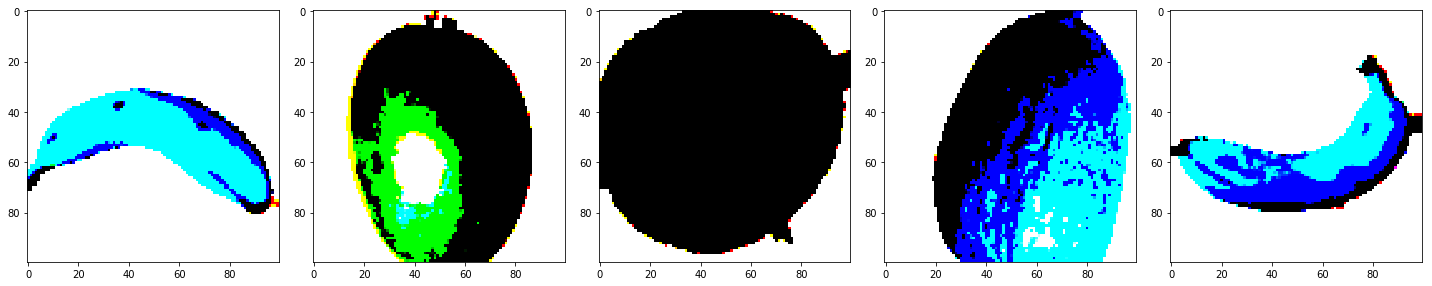

In [111]:
# The data should be preprocessed properly. This has been done by passing (preprocessing_function=preprocess_input) above which reorders the channels from RGB to BGR
# should be a strangely colored images (due to resnet weights being BGR)
sample_training_images, _ = next(train_generator)
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    
plotImages(sample_training_images[:5])       # Plot images 0-4

In [112]:
# add preprocessing layer to the front of resnet
res = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in res.layers:
  layer.trainable = False

# our layers - you can add more if you want
x = Flatten()(res.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(len(folders), activation='softmax')(x)


# create a model object
model = Model(inputs=res.input, outputs=prediction)

# tell the model what cost and optimization method to use
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [113]:
# view the structure of the model
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 50, 50, 64)   256         conv1[0][0]                      
____________________________________________________________________________________________

In [114]:
# fit the model
r = model.fit_generator(
    train_generator,
    validation_data=valid_generator,
    epochs=epochs,
    steps_per_epoch = total_train // batch_size,
    validation_steps = total_validation // batch_size
)

Epoch 1/5
117/117 [==============================] - 28s 237ms/step - loss: 0.2057 - acc: 0.9677 - val_loss: 0.2099 - val_acc: 0.9586
Epoch 2/5
117/117 [==============================] - 22s 189ms/step - loss: 0.0447 - acc: 0.9918 - val_loss: 0.0883 - val_acc: 0.9730
Epoch 3/5
117/117 [==============================] - 22s 192ms/step - loss: 8.3874e-04 - acc: 0.9995 - val_loss: 0.1030 - val_acc: 0.9817
Epoch 4/5
117/117 [==============================] - 22s 186ms/step - loss: 0.0059 - acc: 0.9987 - val_loss: 0.0452 - val_acc: 0.9857
Epoch 5/5
117/117 [==============================] - 22s 188ms/step - loss: 0.0119 - acc: 0.9987 - val_loss: 0.0317 - val_acc: 0.9873


In [115]:
def get_confusion_matrix(data_path, total, gen):
  # we need to see the data in the same order
  # for both predictions and targets
  print("Generating confusion matrix", total)
  predictions = []
  targets = []
  for x, y in gen.flow_from_directory(data_path, target_size=IMAGE_SIZE, shuffle=False, batch_size=batch_size * 2):
    p = model.predict(x)
    p = np.argmax(p, axis=1)
    y = np.argmax(y, axis=1)
    predictions = np.concatenate((predictions, p))
    targets = np.concatenate((targets, y))
    if len(targets) >= total:
      break

  cm = confusion_matrix(targets, predictions)
  return cm


cm = get_confusion_matrix(train_dir, total_train, image_gen_train)
print(cm)
valid_cm = get_confusion_matrix(validation_dir, total_validation, image_gen_val)
print(valid_cm)

Generating confusion matrix 3748
Found 3748 images belonging to 8 classes.
[[492   0   0   0   0   0   0   0]
 [  0 427   0   0   0   0   0   0]
 [  0   0 482   0   8   0   0   0]
 [  0   0   0 466   0   0   0   0]
 [  2   0   0   0 490   0   0   0]
 [  0   0   0   0   0 399   0   0]
 [  0   0   0   0   0   0 490   0]
 [  0   0   0   0   0   0   0 492]]
Generating confusion matrix 1289
Found 1289 images belonging to 8 classes.
[[164   0   0   0   0   0   0   0]
 [  0 143   0   0   0   0   0   0]
 [  0   0 154   0  12   0   0   0]
 [  0   0   0 156   0   0   0   0]
 [  3   0   0   0 161   0   0   0]
 [  0   0   0   0   0 166   0   0]
 [  0   0   0   0   0   0 166   0]
 [  0   0   0   0   0   0   0 164]]


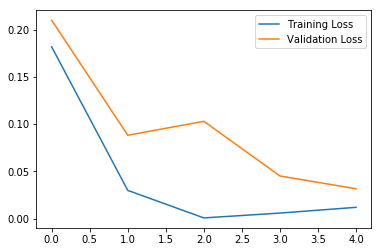

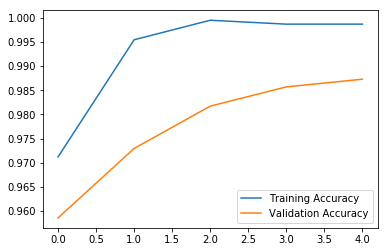

In [116]:
# plot some data

# loss
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

# accuracies
plt.plot(r.history['acc'], label='Training Accuracy')
plt.plot(r.history['val_acc'], label='Validation Accuracy')
plt.legend()
plt.show()